**Check effect of lz**

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Packages form Henriks Github
from lammps_logfile import running_mean, get_color_value
from regex_file_collector import Collector
from regex_file_collector.utils import floating_number_pattern
import lammps_logfile

In [19]:
def save_figure(output_file_name):
    plt.savefig(output_file_name, dpi=None, facecolor='w', edgecolor='w', orientation='portrait')

In [20]:
paths = ['/home/users/marthgg/2021_08_quartz_simulations_x3000_z1200/crack_simulation_deformZ_1.030000/fracture_displacement.npy',
         '/home/users/marthgg/2021_08_quartz_simulations/crack_simulation_deformZ_1.030000/fracture_displacement.npy',
         '/home/users/marthgg/2021_05_simulations_quartz_relaxed_structure/x3000_y200/crack_simulation_deformZ_1.037285/fracture_displacement.npy',
         '/home/users/marthgg/2021_08_quartz_simulations/crack_simulation_deformZ_1.038000/fracture_displacement.npy',
         '/home/users/marthgg/2021_11_thin_sample/crack_simulation_deformZ_1.100000/fracture_displacement.npy']

logfile_folders = ['/home/users/marthgg/2021_08_quartz_simulations_x3000_z1200/crack_simulation_deformZ_1.030000/log.lammps',
                   '/home/users/marthgg/2021_08_quartz_simulations/crack_simulation_deformZ_1.030000/log.lammps',
                   '/home/users/marthgg/2021_05_simulations_quartz_relaxed_structure/x3000_y200/crack_simulation_deformZ_1.037285/log.lammps',
                   '/home/users/marthgg/2021_08_quartz_simulations/crack_simulation_deformZ_1.038000/log.lammps',
                   '/home/users/marthgg/2021_11_thin_sample/crack_simulation_deformZ_1.2100000/log.lammps']

lz = [1200, 600, 200, 600, 100]

784.4738874259826
/home/users/marthgg/2021_08_quartz_simulations/crack_simulation_deformZ_1.030000/fracture_displacement.npy
43
217.2044350657547
/home/users/marthgg/2021_08_quartz_simulations/crack_simulation_deformZ_1.038000/fracture_displacement.npy
26
/home/users/marthgg/2021_11_thin_sample/crack_simulation_deformZ_1.200000/fracture_displacement.npy
19
1070.0905464439331


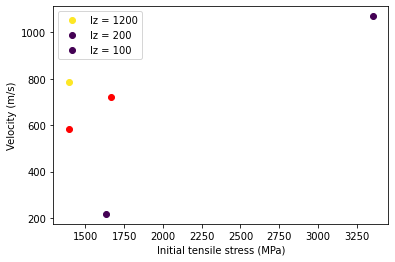

In [22]:
system_length = 3000
crack_start_point = 150

k = 0

for path in paths:
        
    filename = path

    data = np.load(filename, allow_pickle=False)
    frames = list(range(0, len(data)))

    filtered_data_crackTip = []
    filtered_data_frames   = []

    for i in range(0, len(data)):
        if data[i] > crack_start_point and data[i] < system_length:
            filtered_data_crackTip.append(data[i])
            filtered_data_frames.append(frames[i])            
    
    for i in range(0, len(filtered_data_frames)):
        if filtered_data_crackTip[i] > 2910:
            print(filename)
            print(filtered_data_frames[i])
            break

    # Find velocity
    timestep = 0.001 # ps
    dump_frequency = 10000

    time_s = []
    time = []
    for i in range(0, len(filtered_data_frames)):
        time.append(filtered_data_frames[i]*timestep*dump_frequency) #Time in ps
        if filtered_data_crackTip[i] < 2910:
            time_s.append(filtered_data_frames[i]*timestep*dump_frequency*(10**-12)) #time in s

    position_m = []
    for i in range(0, len(filtered_data_crackTip)):
        if filtered_data_crackTip[i] < 2910:
            position_m.append(filtered_data_crackTip[i]*(10**-10)) #distance in m

    velocity = np.diff(position_m)/np.diff(time_s)
    mean_velocity = np.mean(velocity)
    
    logfile = logfile_folders[k]
    log = lammps_logfile.File(logfile)
    pzz = log.get('Pzz')
    min_pressure = np.min(pzz)
    
    if lz[k] == 600:
        plt.figure(1)
        plt.plot((min_pressure/10)*-1, mean_velocity, 'ro')
        plt.xlabel('Initial tensile stress (MPa)')
        plt.ylabel('Velocity (m/s)')
        
        #save_figure('/home/users/marthgg/2021_11_figures/compressive_stress.ps')
    
    else:
   
        plt.figure(1)
        plt.plot((min_pressure/10)*-1, mean_velocity, 'o', color=get_color_value(float(lz[k]), 200, 1200), label='lz = %d' %lz[k])
        plt.xlabel('Initial tensile stress (MPa)')
        plt.ylabel('Velocity (m/s)')
        print(mean_velocity)
        
        #save_figure('/home/users/marthgg/2021_11_figures/compressive_stress.ps')

    k += 1
    plt.legend()